# Collaboration and Competition

---

You are welcome to use this coding environment to train your agent for the project.  Follow the instructions below to get started!

### 1. Start the Environment

Run the next code cell to install a few packages.  This line will take a few minutes to run!

In [1]:
#!tar -xvzf baselines.tar.gz
#!unzip multiagent.zip
!pip -q install ./python

tensorflow 1.7.1 has requirement numpy>=1.13.3, but you'll have numpy 1.12.1 which is incompatible.
ipython 6.5.0 has requirement prompt-toolkit<2.0.0,>=1.0.15, but you'll have prompt-toolkit 3.0.6 which is incompatible.


The environment is already saved in the Workspace and can be accessed at the file path provided below. 

In [2]:
from unityagents import UnityEnvironment
import numpy as np

env = UnityEnvironment(file_name="/data/Tennis_Linux_NoVis/Tennis")

INFO:unityagents:
'Academy' started successfully!
Unity Academy name: Academy
        Number of Brains: 1
        Number of External Brains : 1
        Lesson number : 0
        Reset Parameters :
		
Unity brain name: TennisBrain
        Number of Visual Observations (per agent): 0
        Vector Observation space type: continuous
        Vector Observation space size (per agent): 8
        Number of stacked Vector Observation: 3
        Vector Action space type: continuous
        Vector Action space size (per agent): 2
        Vector Action descriptions: , 


Environments contain **_brains_** which are responsible for deciding the actions of their associated agents. Here we check for the first brain available, and set it as the default brain we will be controlling from Python.

In [4]:
# get the default brain
brain_name = env.brain_names[0]
print(brain_name)
brain = env.brains[brain_name]
print(brain)

TennisBrain
Unity brain name: TennisBrain
        Number of Visual Observations (per agent): 0
        Vector Observation space type: continuous
        Vector Observation space size (per agent): 8
        Number of stacked Vector Observation: 3
        Vector Action space type: continuous
        Vector Action space size (per agent): 2
        Vector Action descriptions: , 


### 2. Examine the State and Action Spaces

Run the code cell below to print some information about the environment.

In [5]:
# reset the environment
env_info = env.reset(train_mode=True)[brain_name]

# number of agents 
num_agents = len(env_info.agents)
print('Number of agents:', num_agents)

# size of each action
action_size = brain.vector_action_space_size
print('Size of each action:', action_size)

# examine the state space 
states = env_info.vector_observations
state_size = states.shape[1]
print('There are {} agents. Each observes a state with length: {}'.format(states.shape[0], state_size))
print('The state for the first agent looks like:', states[0])

Number of agents: 2
Size of each action: 2
There are 2 agents. Each observes a state with length: 24
The state for the first agent looks like: [ 0.          0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.          0.
  0.          0.         -6.65278625 -1.5        -0.          0.
  6.83172083  6.         -0.          0.        ]


### 3. Take Random Actions in the Environment

In the next code cell, you will learn how to use the Python API to control the agent and receive feedback from the environment.

Note that **in this coding environment, you will not be able to watch the agents while they are training**, and you should set `train_mode=True` to restart the environment.

In [6]:
for i in range(5):                                         # play game for 5 episodes
    env_info = env.reset(train_mode=True)[brain_name]     # reset the environment    
    states = env_info.vector_observations                  # get the current state (for each agent)
    scores = np.zeros(num_agents)                          # initialize the score (for each agent)
    while True:
        actions = np.random.randn(num_agents, action_size) # select an action (for each agent)
        actions = np.clip(actions, -1, 1)                  # all actions between -1 and 1
        env_info = env.step(actions)[brain_name]           # send all actions to tne environment
        next_states = env_info.vector_observations         # get next state (for each agent)
        rewards = env_info.rewards                         # get reward (for each agent)
        dones = env_info.local_done                        # see if episode finished
        scores += env_info.rewards                         # update the score (for each agent)
        states = next_states                               # roll over states to next time step
        if np.any(dones):                                  # exit loop if episode finished
            break
    print('Total score (averaged over agents) this episode: {}'.format(np.mean(scores)))

Total score (averaged over agents) this episode: 0.04500000085681677
Total score (averaged over agents) this episode: -0.004999999888241291
Total score (averaged over agents) this episode: -0.004999999888241291
Total score (averaged over agents) this episode: -0.004999999888241291
Total score (averaged over agents) this episode: -0.004999999888241291


In [7]:
env_info = env.reset(train_mode=True)[brain_name]

When finished, you can close the environment.

In [8]:
import torch
import numpy as np
from collections import deque
from unityagents import UnityEnvironment
from agent import Agent
from agent import ReplayBuffer
import matplotlib.pyplot as plt
from random import randint
%matplotlib inline

In [9]:
# Hyperparameters configuration for Actor and Critic Network.
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
random_seed = 2
print(random_seed)                 
actor_hidden_units = (512,256)
actor_learning_rate = 1e-4

critic_hidden_units = (512,256)
critic_learning_rate = 3e-4

tau = 1e-3
weight_decay = 0
learning_rate = 0.001
batch_size = 1024
buffer_size = int(1e5)
discount = 0.99

2


In [10]:
action_size = brain.vector_action_space_size
print("Action Size")
print(action_size)
states = env_info.vector_observations
state_size = states.shape[1]
print("State Size")
print(state_size)
num_agents = len(env_info.agents)
print("Number of Environment Agents")
print(num_agents)

Action Size
2
State Size
24
Number of Environment Agents
2


In [11]:
tennis_multiagents = []

# Create DDPG Agents for each environment agents.
for i in range(len(env_info.agents)):
      
    tennis_multiagents.append(Agent(random_seed, device, action_size, state_size, actor_hidden_units, actor_learning_rate, critic_hidden_units,critic_learning_rate,weight_decay,buffer_size,batch_size,tau))

print(tennis_multiagents)

Intialization of Network for Actor
Layers of Actor
Linear(in_features=24, out_features=512, bias=True)
Linear(in_features=512, out_features=256, bias=True)
Linear(in_features=256, out_features=2, bias=True)
Intialization of Network for Actor
Layers of Actor
Linear(in_features=24, out_features=512, bias=True)
Linear(in_features=512, out_features=256, bias=True)
Linear(in_features=256, out_features=2, bias=True)
Intialization of Network for Critic
Layers of Critic
Linear(in_features=24, out_features=512, bias=True)
Linear(in_features=514, out_features=256, bias=True)
Linear(in_features=256, out_features=1, bias=True)
Intialization of Network for Critic
Layers of Critic
Linear(in_features=24, out_features=512, bias=True)
Linear(in_features=514, out_features=256, bias=True)
Linear(in_features=256, out_features=1, bias=True)
Intialization of Network for Actor
Layers of Actor
Linear(in_features=24, out_features=512, bias=True)
Linear(in_features=512, out_features=256, bias=True)
Linear(in_fe

In [12]:
# GPU Details
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print('Using device:', device)
print()

#Additional Info when using cuda
if device.type == 'cuda':
    print(torch.cuda.get_device_name(0))
    print('Memory Usage:')
    print('Allocated:', round(torch.cuda.memory_allocated(0)/1024**3,1), 'GB')
    print('Cached:   ', round(torch.cuda.memory_cached(0)/1024**3,1), 'GB')

Using device: cuda

Tesla K80
Memory Usage:
Allocated: 0.0 GB
Cached:    0.0 GB


In [13]:
# Intialize a Shared replay memory for the agents.
# Intialize a Shared replay memory for the agents.
shared_agents_memory = ReplayBuffer(action_size, buffer_size, batch_size, random_seed, device)

In [14]:
# Multiagent steps
def multiagent_step(t_step, states, actions, rewards, next_states, dones):
    """ Add the state, next state and reward into replay buffer and sample the next experience from replay buffer.""" 
        
    for state, action, reward, next_state, done in zip(states, actions, rewards, next_states, dones):
        shared_agents_memory.add(state, action, reward, next_state, done)
        
    # Learning at each 4 steps defined in Hyperparameters.
    t_step = (t_step + 1) % 4
        
    if t_step == 0:
        # If more samples are available in replay buffer get random subset and learn
        if len(shared_agents_memory) > batch_size:
              
                for agent in tennis_multiagents:
                    
                    experiences = shared_agents_memory.sample()
                    
                    agent.learn(experiences, discount)


In [15]:
from workspace_utils import keep_awake
import time

def train_multiagent(n_episodes=30000, max_t=2000):
    
    all_max_scores = []
    all_min_scores = []
    all_avg_scores = []
    
    cumulative_mean_counter = 0
    
    scores_window = deque(maxlen=100)
    
    time_start = time.time()
    
    for i_episode in keep_awake(range(1, n_episodes+1)):
        
        # Reset the agents at starting of each episode
        for agent in tennis_multiagents:
            agent.reset()
        
        env_info = env.reset(train_mode=True)[brain_name]
        
        states = env_info.vector_observations  
        
        scores = np.zeros(num_agents)
        #print(scores)
        #print("Episode")
        timestep = time.time()
        for i in range(max_t):
            
            # Next action state of multiagent
            actions = [agent.act(np.expand_dims(states, axis=0)) for agent, states in zip(tennis_multiagents, states)]
                
            env_info = env.step(actions)[brain_name]
            rewards = env_info.rewards
            next_states = env_info.vector_observations
            dones = env_info.local_done
            
            # Learning Step.
            multiagent_step(i, states, actions, rewards, next_states, dones)

            # Add up all the rewards of each agent.
            scores += rewards
            states = next_states
        print("Agents scores after 2000 timesteps in Episode {}".format(i_episode))    
        print(scores)        
        
        all_avg_scores.append(np.mean(scores))
        all_max_scores.append(np.max(scores))
        all_min_scores.append(np.min(scores))
        
        if np.mean(all_max_scores)>=0.5:
            cumulative_mean_counter += 1
        
        print('\rEpisode: {}\tMax: {:.2f}\tMin: {:.2f}\tAverage: {:.2f}\tCumulative Average: {:.2f} in time: {:.2f}'.format(i_episode,np.max(scores),np.min(scores),np.mean(scores),np.mean(all_max_scores),timestep-time_start))
        if i_episode % 100 == 0:
            print('\rEpisodes(Min,Max and Avg scores till now): {}\tMax: {:.2f}\tMin: {:.2f}\tAverage: {:.2f} in time: {:.2f}'.format(i_episode,np.max(all_max_scores),np.min(all_min_scores), np.mean(all_max_scores),timestep-time_start))
        # Average over 100 episodes is greater than 0.5 over more than 100 consecutive episodes
        if np.mean(all_max_scores)>=0.5 and len(all_max_scores) > 100 and cumulative_mean_counter > 100:
            time_finish = time.time()
            print('\nEnvironment solved in {:d} episodes!\tAverage Score: {:.2f} in time: {:.2f}'.format(i_episode, np.mean(all_max_scores), time_finish-time_start))
            torch.save(tennis_multiagents[0].actor_local.state_dict(), 'checkpoint_actor.pth')
            torch.save(tennis_multiagents[0].critic_local.state_dict(), 'checkpoint_critic.pth')
            break 
            
    return all_avg_scores, all_max_scores, all_min_scores

In [16]:
avg_scores, max_scores, min_scores = train_multiagent()

Agents scores after 2000 timesteps in Episode 1
[-0.53999999 -0.79999998]
Episode: 1	Max: -0.54	Min: -0.80	Average: -0.67	Cumulative Average: -0.54 in time: 0.01
Agents scores after 2000 timesteps in Episode 2
[-0.66999999 -0.71999998]
Episode: 2	Max: -0.67	Min: -0.72	Average: -0.69	Cumulative Average: -0.60 in time: 35.27
Agents scores after 2000 timesteps in Episode 3
[-0.59999999 -0.78999998]
Episode: 3	Max: -0.60	Min: -0.79	Average: -0.69	Cumulative Average: -0.60 in time: 80.76
Agents scores after 2000 timesteps in Episode 4
[-0.25999998 -0.65999999]
Episode: 4	Max: -0.26	Min: -0.66	Average: -0.46	Cumulative Average: -0.52 in time: 126.48
Agents scores after 2000 timesteps in Episode 5
[ 1.78000004  0.12000003]
Episode: 5	Max: 1.78	Min: 0.12	Average: 0.95	Cumulative Average: -0.06 in time: 172.38
Agents scores after 2000 timesteps in Episode 6
[-0.38999998 -0.39999998]
Episode: 6	Max: -0.39	Min: -0.40	Average: -0.39	Cumulative Average: -0.11 in time: 218.63
Agents scores after 200

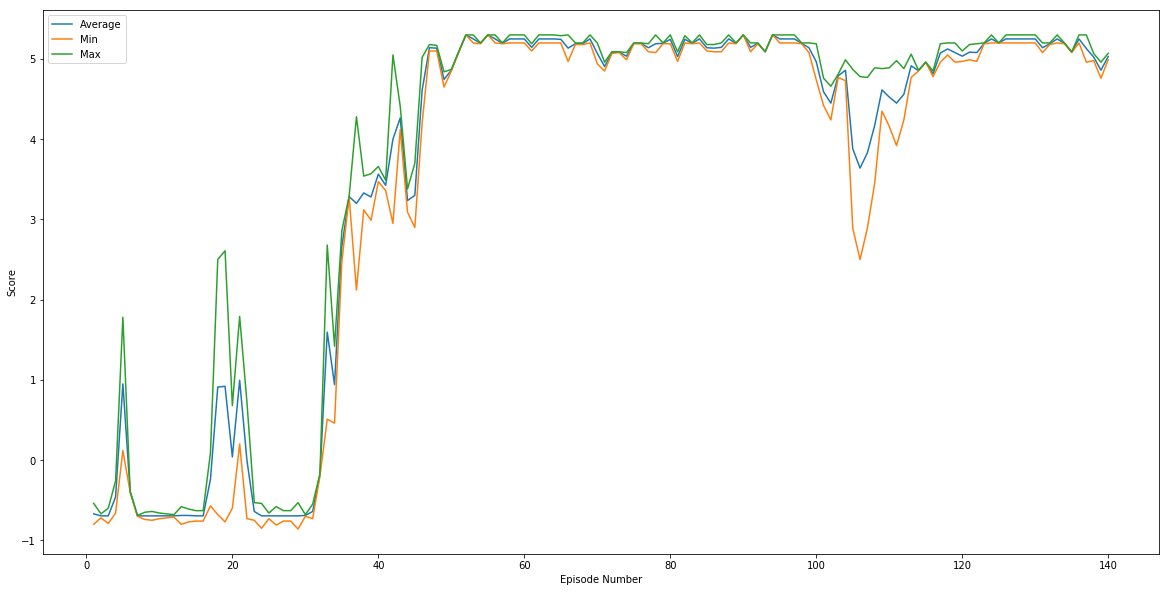

In [17]:
# plot the average, max and min scores
plt.figure(figsize=(20,10))
plt.plot(np.arange(1, len(avg_scores)+1), avg_scores)
plt.plot(np.arange(1, len(min_scores)+1), min_scores)
plt.plot(np.arange(1, len(max_scores)+1), max_scores)
plt.ylabel('Score')
plt.xlabel('Episode Number')
plt.legend(['Average', 'Min', 'Max'], loc='upper left')
plt.savefig('episode_score_plot.png')

plt.show()

In [18]:
agent1 = Agent(random_seed, device, action_size, state_size, actor_hidden_units, actor_learning_rate, critic_hidden_units,critic_learning_rate,weight_decay,buffer_size,batch_size,tau)
agent1.load('checkpoint_actor.pth', 'checkpoint_critic.pth')

for i in range(5):                                         # play game for 5 episodes
    env_info = env.reset(train_mode=True)[brain_name]     # reset the environment    
    states = env_info.vector_observations                  # get the current state (for each agent)
    scores = np.zeros(num_agents)                          # initialize the score (for each agent)
    while True:
        actions = np.random.randn(num_agents, action_size) # select an action (for each agent)
        actions = agent1.act(states)                  # all actions between -1 and 1
        env_info = env.step(actions)[brain_name]           # send all actions to tne environment
        next_states = env_info.vector_observations         # get next state (for each agent)
        rewards = env_info.rewards                         # get reward (for each agent)
        dones = env_info.local_done                        # see if episode finished
        scores += env_info.rewards                         # update the score (for each agent)
        states = next_states                               # roll over states to next time step
        if np.any(dones):                                  # exit loop if episode finished
            break
    print('Total score (averaged over agents) this episode: {}'.format(np.mean(scores)))

Intialization of Network for Actor
Layers of Actor
Linear(in_features=24, out_features=512, bias=True)
Linear(in_features=512, out_features=256, bias=True)
Linear(in_features=256, out_features=2, bias=True)
Intialization of Network for Actor
Layers of Actor
Linear(in_features=24, out_features=512, bias=True)
Linear(in_features=512, out_features=256, bias=True)
Linear(in_features=256, out_features=2, bias=True)
Intialization of Network for Critic
Layers of Critic
Linear(in_features=24, out_features=512, bias=True)
Linear(in_features=514, out_features=256, bias=True)
Linear(in_features=256, out_features=1, bias=True)
Intialization of Network for Critic
Layers of Critic
Linear(in_features=24, out_features=512, bias=True)
Linear(in_features=514, out_features=256, bias=True)
Linear(in_features=256, out_features=1, bias=True)
Total score (averaged over agents) this episode: 2.650000039488077
Total score (averaged over agents) this episode: 0.09500000160187483
Total score (averaged over agent

In [19]:
env.close()

### 4. It's Your Turn!

Now it's your turn to train your own agent to solve the environment!  A few **important notes**:
- When training the environment, set `train_mode=True`, so that the line for resetting the environment looks like the following:
```python
env_info = env.reset(train_mode=True)[brain_name]
```
- To structure your work, you're welcome to work directly in this Jupyter notebook, or you might like to start over with a new file!  You can see the list of files in the workspace by clicking on **_Jupyter_** in the top left corner of the notebook.
- In this coding environment, you will not be able to watch the agents while they are training.  However, **_after training the agents_**, you can download the saved model weights to watch the agents on your own machine! 